## Observations and Insights 

# 1.For a selected mouse, tumor volume is consistently decreasing with the advancement of time for Capomulin drug regimen.

# 2.Capumulin is performing better to decrease tumor volume than compare to other drugs specifically Infubinol and Ceftamin.

# 3.There is a proportional relation between weight and tumor volume. With the increment of weight tumor volume is increasing.


In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_mouse_data_df

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_data= combined_mouse_data_df['Mouse ID'].unique()
mice_count = len(mouse_data)
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_mouse_data_df[combined_mouse_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_df['Mouse ID']

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_data_df.drop_duplicates(['Mouse ID','Timepoint'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data = combined_mouse_data_df['Mouse ID'].unique()
total_Mice_count = len(clean_mouse_data)
total_Mice_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#df.groupby('Genre')['Word Vector'].apply(np.mean)

combined_mouse_data_mean = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(np.mean)
combined_mouse_data_mean_df = pd.DataFrame(combined_mouse_data_mean)


combined_mouse_data_median = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(np.median)
combined_mouse_data_median_df = pd.DataFrame(combined_mouse_data_median)

combined_mouse_data_std = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(np.std)
combined_mouse_data_std_df = pd.DataFrame(combined_mouse_data_std)

combined_mouse_data_var = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(np.var)
combined_mouse_data_var_df = pd.DataFrame(combined_mouse_data_var)

combined_mouse_data_sem = combined_mouse_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(st.sem)
combined_mouse_data_sem_df = pd.DataFrame(combined_mouse_data_sem)


merged_df = pd.merge(combined_mouse_data_mean_df,combined_mouse_data_median_df, on="Drug Regimen")
merged_df = merged_df.rename(columns = {'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median'})

#merged_df
merged_df = pd.merge(merged_df,combined_mouse_data_std_df, on="Drug Regimen")
merged_New_df = pd.merge(merged_df,combined_mouse_data_var_df, on="Drug Regimen")

merged_New_df = pd.merge(merged_New_df,combined_mouse_data_sem_df, on="Drug Regimen")

merged_New_df = merged_New_df.rename(columns = {'Tumor Volume (mm3)_x':'StandardDeviation','Tumor Volume (mm3)_y':'Variance', 'Tumor Volume (mm3)':'SEM'})

merged_New_df

,Mean,Median,StandardDeviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.983904,24.839296,0.329346
Ceftamin,52.591172,51.776157,6.250556,39.069446,0.469821
Infubinol,52.884795,51.820584,6.548770,42.886388,0.492236
Ketapril,55.235638,53.698743,8.257659,68.188930,0.603860
Naftisol,54.331565,52.509285,8.112811,65.817708,0.596466
Placebo,54.033581,52.288934,7.799368,60.830138,0.581331
Propriva,52.322552,50.854632,6.487528,42.088020,0.512884
Ramicane,40.216745,40.673236,4.835669,23.383692,0.320955
Stelasyn,54.233149,52.431737,7.689090,59.122106,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


combined_mouse_data_df.groupby(['Drug Regimen']).agg(
    {
         'Tumor Volume (mm3)': ["mean", "median","std","var","sem"]
    }
)


Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.322552  50.854632  6.507770  42.351070  0.512884
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

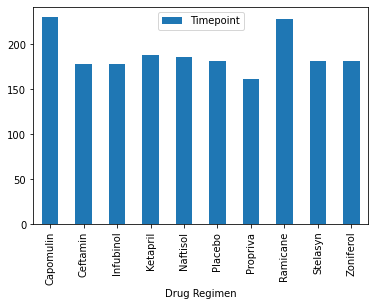

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

combined_mouse_data_count = combined_mouse_data_df.groupby('Drug Regimen',as_index = False)['Timepoint'].count()
combined_mouse_data_count_df = pd.DataFrame(combined_mouse_data_count)
combined_mouse_data_count_bar = combined_mouse_data_df.groupby('Drug Regimen')['Timepoint'].count()
combined_mouse_data_count_bar_df = pd.DataFrame(combined_mouse_data_count_bar)

combined_mouse_data_count_bar_df.plot.bar()

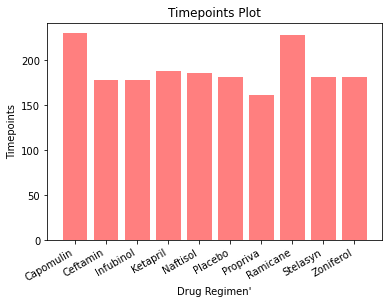

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

Timepoint = combined_mouse_data_count_df['Timepoint']
Drug_Regimen = combined_mouse_data_count_df['Drug Regimen']
x_axis = np.arange(len(Drug_Regimen))

plt.bar(x_axis, Timepoint, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_Regimen ,rotation=30,ha='right' )

# Give our chart some labels and a tile
plt.title("Timepoints Plot")
plt.xlabel("Drug Regimen'")
plt.ylabel("Timepoints")

plt.rcParams["figure.figsize"] = (10, 8)



<AxesSubplot:ylabel='Sex'>

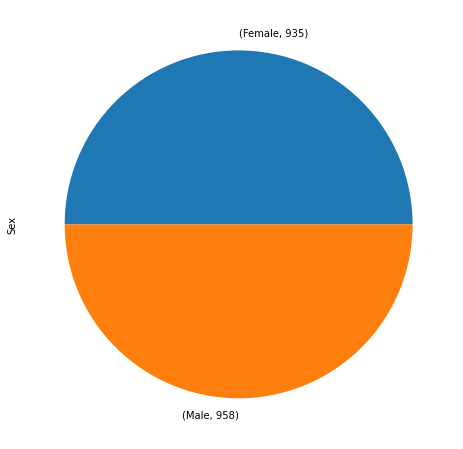

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_mouse_data_Sex = combined_mouse_data_df.groupby('Sex',as_index = False)['Mouse ID'].count()
combined_mouse_data_Sex_df = pd.DataFrame(combined_mouse_data_Sex)
combined_mouse_data_Sex_count = combined_mouse_data_Sex_df.value_counts()
combined_mouse_data_Sex_count.plot(kind='pie', ylabel='Sex')

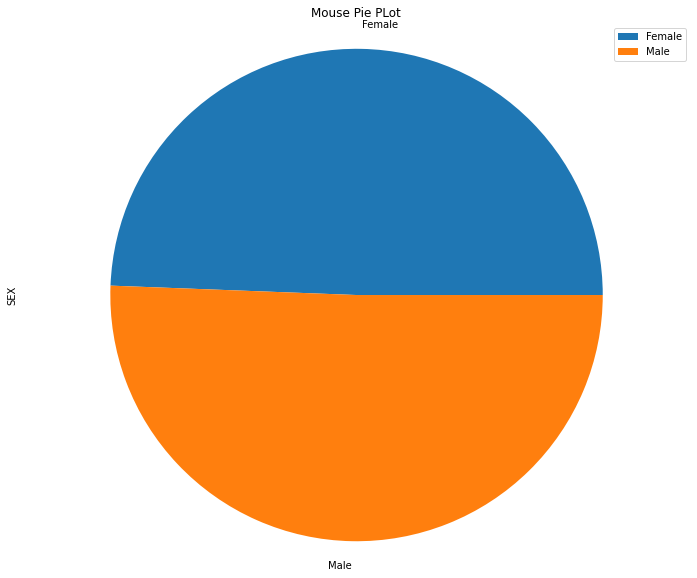

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


combined_mouse_data_Gender_df=combined_mouse_data_Sex_df.set_index('Sex')

gender_pie = combined_mouse_data_Gender_df.plot(kind="pie", y='Mouse ID', title=("Mouse Pie PLot"),figsize=(12,10))
gender_pie.set_ylabel("SEX")

plt.axis("equal");


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

combined_mouse_data_max_tp = combined_mouse_data_df['Timepoint'].max()

combined_mouse_data_max_tp_df =  combined_mouse_data_df.loc[((combined_mouse_data_df['Drug Regimen']=='Capomulin')|(combined_mouse_data_df['Drug Regimen']=='Ramicane')|(combined_mouse_data_df['Drug Regimen']=='Infubinol')|(combined_mouse_data_df['Drug Regimen']=='Ceftamin')) & (combined_mouse_data_df['Timepoint'] == combined_mouse_data_max_tp)]

combined_mouse_data_max_tp_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

combined_mouse_data_max_tp_df = combined_mouse_data_max_tp_df.drop(columns = ['Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Metastatic Sites'])
combined_mouse_data_max_tp_df = combined_mouse_data_max_tp_df.rename(columns = {'Tumor Volume (mm3)':'Final_Tumer_Volume'})


merged_mouse_df = pd.merge(combined_mouse_data_max_tp_df,combined_mouse_data_df, on="Mouse ID")

merged_mouse_df

#combined_mouse_data_max_tp


,Mouse ID,Final_Tumer_Volume,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,22.050126,Ramicane,Male,21,16,0,45.000000,0
1,k403,22.050126,Ramicane,Male,21,16,5,38.825898,0
2,k403,22.050126,Ramicane,Male,21,16,10,35.014271,1
3,k403,22.050126,Ramicane,Male,21,16,15,34.223992,1
4,k403,22.050126,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
625,z581,62.754451,Infubinol,Female,24,25,25,54.316407,2
626,z581,62.754451,Infubinol,Female,24,25,30,56.286750,2
627,z581,62.754451,Infubinol,Female,24,25,35,58.628399,3
628,z581,62.754451,Infubinol,Female,24,25,40,60.053740,3


The lower quartile of Tumer Volume is: 40.220170787499995
The upper quartile of Tumer Volume is: 50.356470630000004
The interquartile range of Tumer Volume is: 10.136299842500009
The the median of Tumer Volume is: 45.0 
Values below 25.015721023749983 could be outliers.
Values above 65.56092039375002 could be outliers.


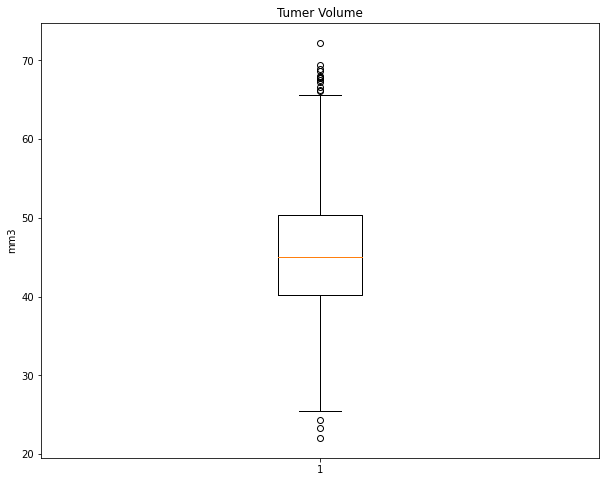

The lower quartile(Capmulin) of Tumer Volume is: 40.220170787499995
The upper quartile(Capmulin) of Tumer Volume is: 50.356470630000004
The interquartile (Capmulin)range of Tumer Volume is: 10.136299842500009
The the median(Capmulin) of Tumer Volume is: 45.0 
Values(Capmulin) below 25.015721023749983 could be outliers.
Values(Capmulin) above 65.56092039375002 could be outliers.


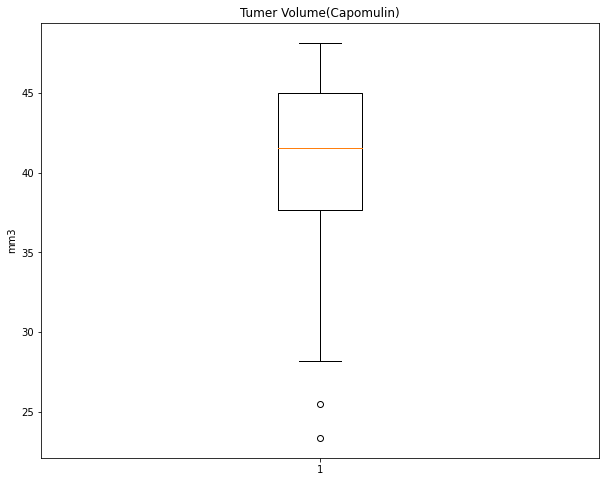

The lower quartile(Ramicane) of Tumer Volume is: 40.220170787499995
The upper quartile(Ramicane) of Tumer Volume is: 50.356470630000004
The interquartile (Ramicane)range of Tumer Volume is: 10.136299842500009
The the median(Ramicane) of Tumer Volume is: 45.0 
Values(Ramicane) below 25.015721023749983 could be outliers.
Values(Ramicane) above 65.56092039375002 could be outliers.


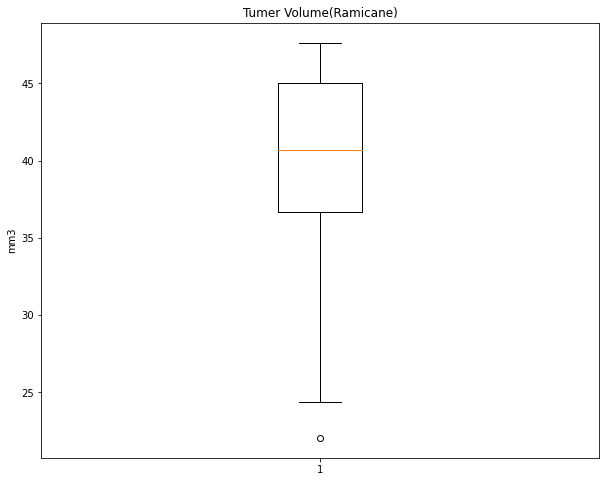

The lower quartile(Infubinol) of Tumer Volume is: 40.220170787499995
The upper quartile(Infubinol) of Tumer Volume is: 50.356470630000004
The interquartile (Infubinol)range of Tumer Volume is: 10.136299842500009
The the median(Infubinol) of Tumer Volume is: 45.0 
Values(Infubinol) below 25.015721023749983 could be outliers.
Values(Infubinol) above 65.56092039375002 could be outliers.


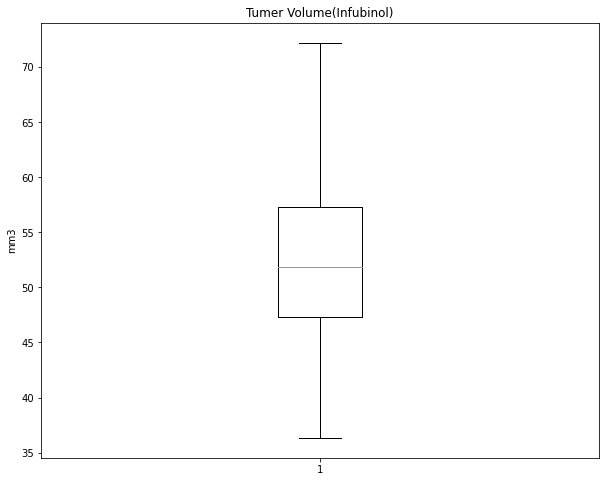

The lower quartile(Ceftamin) of Tumer Volume is: 40.220170787499995
The upper quartile(Ceftamin) of Tumer Volume is: 50.356470630000004
The interquartile (Ceftamin)range of Tumer Volume is: 10.136299842500009
The the median(Ceftamin) of Tumer Volume is: 45.0 
Values(Ceftamin) below 25.015721023749983 could be outliers.
Values(Ceftamin) above 65.56092039375002 could be outliers.


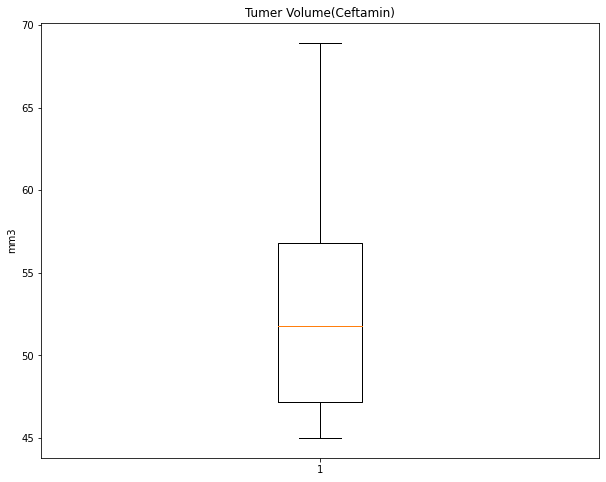

In [27]:
# Put treatments regimens into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

selected_mouse_data_df =  combined_mouse_data_df.loc[(combined_mouse_data_df['Drug Regimen']=='Capomulin')|(combined_mouse_data_df['Drug Regimen']=='Ramicane')|(combined_mouse_data_df['Drug Regimen']=='Infubinol')|(combined_mouse_data_df['Drug Regimen']=='Ceftamin')]

Tumer_Volume_df = selected_mouse_data_df['Tumor Volume (mm3)']

#Tumer_Volume_df
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = Tumer_Volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumer Volume is: {lowerq}")
print(f"The upper quartile of Tumer Volume is: {upperq}")
print(f"The interquartile range of Tumer Volume is: {iqr}")
print(f"The the median of Tumer Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Tumer Volume')
ax1.set_ylabel('mm3')
ax1.boxplot(Tumer_Volume_df)
plt.show()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
#Capmulin    
selected_mouse_data_Capmulin_df =  combined_mouse_data_df.loc[(combined_mouse_data_df['Drug Regimen']=='Capomulin')]

Tumer_Volume_Capomulin_df = selected_mouse_data_Capmulin_df['Tumor Volume (mm3)']

quartiles = Tumer_Volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile(Capmulin) of Tumer Volume is: {lowerq}")
print(f"The upper quartile(Capmulin) of Tumer Volume is: {upperq}")
print(f"The interquartile (Capmulin)range of Tumer Volume is: {iqr}")
print(f"The the median(Capmulin) of Tumer Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values(Capmulin) below {lower_bound} could be outliers.")
print(f"Values(Capmulin) above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Tumer Volume(Capomulin)')
ax1.set_ylabel('mm3')
ax1.boxplot(Tumer_Volume_Capomulin_df)
plt.show()


#Ramicane

selected_mouse_data_Ramicane_df =  combined_mouse_data_df.loc[(combined_mouse_data_df['Drug Regimen']=='Ramicane')]

Tumer_Volume_Ramicane_df = selected_mouse_data_Ramicane_df['Tumor Volume (mm3)']

quartiles = Tumer_Volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile(Ramicane) of Tumer Volume is: {lowerq}")
print(f"The upper quartile(Ramicane) of Tumer Volume is: {upperq}")
print(f"The interquartile (Ramicane)range of Tumer Volume is: {iqr}")
print(f"The the median(Ramicane) of Tumer Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values(Ramicane) below {lower_bound} could be outliers.")
print(f"Values(Ramicane) above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Tumer Volume(Ramicane)')
ax1.set_ylabel('mm3')
ax1.boxplot(Tumer_Volume_Ramicane_df)
plt.show()

#Infubinol
selected_mouse_data_Infubinol_df =  combined_mouse_data_df.loc[(combined_mouse_data_df['Drug Regimen']=='Infubinol')]

Tumer_Volume_Infubinol_df = selected_mouse_data_Infubinol_df['Tumor Volume (mm3)']

quartiles = Tumer_Volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile(Infubinol) of Tumer Volume is: {lowerq}")
print(f"The upper quartile(Infubinol) of Tumer Volume is: {upperq}")
print(f"The interquartile (Infubinol)range of Tumer Volume is: {iqr}")
print(f"The the median(Infubinol) of Tumer Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values(Infubinol) below {lower_bound} could be outliers.")
print(f"Values(Infubinol) above {upper_bound} could be outliers.")



fig1, ax1 = plt.subplots()
ax1.set_title('Tumer Volume(Infubinol)')
ax1.set_ylabel('mm3')
ax1.boxplot(Tumer_Volume_Infubinol_df)
plt.show()


#Ceftamin

selected_mouse_data_Ceftamin_df =  combined_mouse_data_df.loc[(combined_mouse_data_df['Drug Regimen']=='Ceftamin')]

Tumer_Volume_Ceftamin_df = selected_mouse_data_Ceftamin_df['Tumor Volume (mm3)']

quartiles = Tumer_Volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile(Ceftamin) of Tumer Volume is: {lowerq}")
print(f"The upper quartile(Ceftamin) of Tumer Volume is: {upperq}")
print(f"The interquartile (Ceftamin)range of Tumer Volume is: {iqr}")
print(f"The the median(Ceftamin) of Tumer Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values(Ceftamin) below {lower_bound} could be outliers.")
print(f"Values(Ceftamin) above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Tumer Volume(Ceftamin)')
ax1.set_ylabel('mm3')
ax1.boxplot(Tumer_Volume_Ceftamin_df)
plt.show()


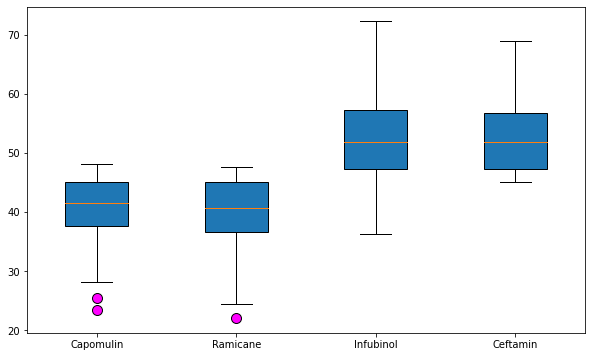

In [37]:
data_to_plot = [Tumer_Volume_Capomulin_df,
                Tumer_Volume_Ramicane_df,
                Tumer_Volume_Infubinol_df,
                Tumer_Volume_Ceftamin_df]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
plt.figure(figsize=(10, 6))
box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3,4],
                  labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], patch_artist=True,
                  flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'fuchsia'})

The lower quartile of Final Tumer Volume is: 33.39765251
The upper quartile of Final Tumer Volume is: 62.43540402
The interquartile range of Final Tumer Volume is: 29.03775151
The the median of Final Tumer Volume is: 40.1592203 
Values below -10.158974755000003 could be outliers.
Values above 105.992031285 could be outliers.


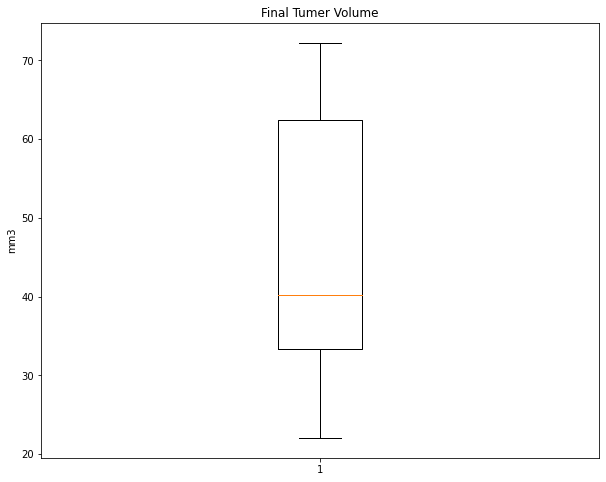

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
selected_mouse_data_df =  combined_mouse_data_df.loc[(combined_mouse_data_df['Drug Regimen']=='Capomulin')|(combined_mouse_data_df['Drug Regimen']=='Ramicane')|(combined_mouse_data_df['Drug Regimen']=='Infubinol')|(combined_mouse_data_df['Drug Regimen']=='Ceftamin')]

Final_Tumer_Volume_df = merged_mouse_df['Final_Tumer_Volume']

#Tumer_Volume_df
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = Final_Tumer_Volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumer Volume is: {lowerq}")
print(f"The upper quartile of Final Tumer Volume is: {upperq}")
print(f"The interquartile range of Final Tumer Volume is: {iqr}")
print(f"The the median of Final Tumer Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumer Volume')
ax1.set_ylabel('mm3')
ax1.boxplot(Final_Tumer_Volume_df)
plt.show()
    


## Line and Scatter Plots

    Timepoint  Tumor Volume (mm3)
10          0           45.000000
11          5           43.878496
12         10           37.614948
13         15           38.177232
14         20           36.866876
15         25           33.949940
16         30           32.959671
17         35           28.328531
18         40           25.472143
19         45           23.343598


Text(0.5, 1.02, 'Line plot of tumor volume vs. time point for a mouse (Mouse ID s185) treated with Capomulin')

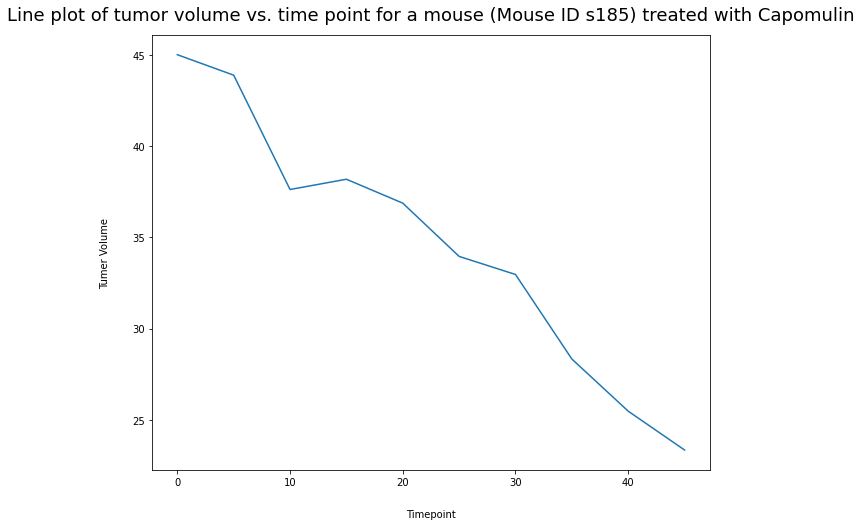

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_data_timepoint_df = combined_mouse_data_df.loc[((combined_mouse_data_df['Drug Regimen'] == 'Capomulin')&(combined_mouse_data_df['Mouse ID']=='s185') ),['Timepoint','Tumor Volume (mm3)']]
print(mouse_data_timepoint_df)


mouse_data_timepoint_df.set_index('Timepoint')['Tumor Volume (mm3)'].plot();

plt.ylabel("Tumer Volume",labelpad = 22)
plt.xlabel("Timepoint",labelpad = 22)

plt.title("Line plot of tumor volume vs. time point for a mouse (Mouse ID s185) treated with Capomulin",y=1.02,fontsize=18)


     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

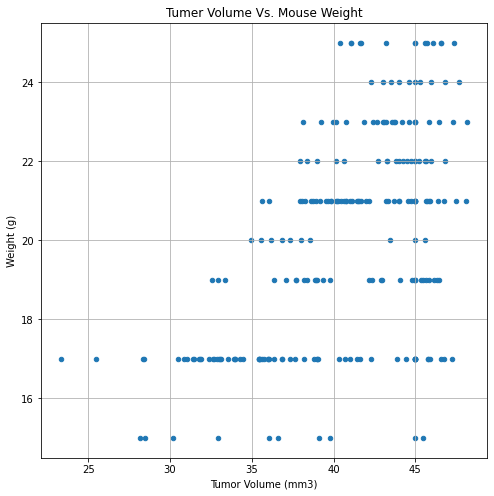

In [23]:
# Generate a scatter plot of  tumor volume vs. mouse weight for the Capomulin regimen
#Tumor_vol_grp = combined_mouse_data_df['Tumor Volume (mm3)']
mouse_data_filtered = combined_mouse_data_df.loc[(combined_mouse_data_df['Drug Regimen'] == 'Capomulin')]

print(mouse_data_filtered)

mouse_data_filtered.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", grid=True, figsize=(8,8),
              title="Tumer Volume Vs. Mouse Weight")
plt.show()



## Correlation and Regression

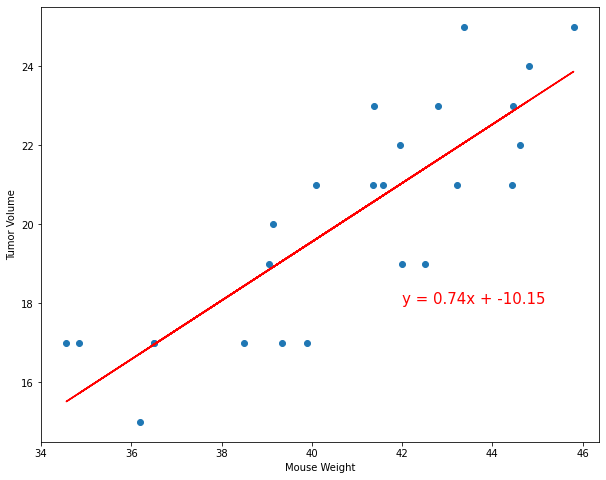

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_grp_regimen=combined_mouse_data_df.loc[(combined_mouse_data_df['Drug Regimen'] == 'Capomulin')]
#print(mouse_grp_regimen)

mouse_grp_regimen_Tvol = mouse_grp_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#mouse_grp_regimen_Tvol
mouse_regimen_weight = combined_mouse_data_df.loc[(combined_mouse_data_df['Drug Regimen'] == 'Capomulin') ]
mouse_regimen_weight_grp = mouse_regimen_weight.groupby('Mouse ID')['Weight (g)'].mean()

#mouse_grp_Tumor = combined_mouse_data_df.groupby('Mouse ID')['Tumor Volume (mm3)']
#avg_mouse_grp_Tumor = mouse_grp_Tumor.mean()
#mouse_grp_Tumor


x_values = mouse_grp_regimen_Tvol
y_values = mouse_regimen_weight_grp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,18),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()